This is a script created by zzx to recreate the results of hmr (a SMPL estimation model) on python 3 and tensorflow 2. Following the instructions from https://github.com/russoale/hmr2.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The environment setup seems to have some conflicts with colab. So I try to skip this procedure, and directly install the requirements

In [2]:
%cd /content/drive/MyDrive/HME/hmr2.0-master/src
!pip install trimesh
!pwd

/content/drive/MyDrive/HME/hmr2.0-master/src
     |████████████████████████████████| 639 kB 8.2 MB/s 
/content/drive/MyDrive/HME/hmr2.0-master/src


In [3]:
# import dependencies

import sys
print(sys.executable, sys.version)

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import trimesh

from os.path import join, abspath
from os import mkdir
from IPython.display import display, HTML
from glob import glob
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib inline

# for local import 
sys.path.append(abspath('..'))

from main.config import Config
from main.model import Model
from main.dataset import Dataset
from main.smpl import Smpl
from main.local import LocalConfig

from visualise.vis_util import draw_2d_on_image, show_2d_pose, show_3d_pose, preprocess_image, resize_img

/usr/bin/python3 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
***** LOGDIR*****:   /data/ssd1/russales/logs/06122021-221820


In [4]:
class TrimeshConfig(LocalConfig):
        BATCH_SIZE = 1
        ENCODER_ONLY = True
        LOG_DIR = abspath('/content/drive/MyDrive/HME/hmr2.0-master/logs/paired/base_model')
        print(LOG_DIR)
        
config = TrimeshConfig()

/content/drive/MyDrive/HME/hmr2.0-master/logs/paired/base_model


In [18]:
# path = '/content/drive/MyDrive/HME/Temporal-Transformer/vertices/vertices.S6.Greeting 1.58860488_resultsgt.npy'
# path = '/content/drive/MyDrive/HME/Temporal-Transformer/vertices/vertices.S6.Greeting 1.58860488_resultsgt.npy'
path ='/content/drive/MyDrive/HME/Temporal-Transformer/vertices.S6.Sitting 1.58860488_resultsgt.npy'
data = np.load(path, allow_pickle=True)

In [29]:
data.item()['vertices'][0]

array([[-0.08513223, -0.9447586 ,  0.07641833],
       [-0.07936227, -0.9304626 ,  0.08385154],
       [-0.08975853, -0.9265063 ,  0.07419925],
       ...,
       [ 0.04099763, -0.89456975, -0.01370095],
       [ 0.04114606, -0.89648414, -0.01194623],
       [ 0.0440145 , -0.8940537 , -0.00911114]], dtype=float32)

In [45]:
path = '/content/drive/MyDrive/HME/Temporal-Transformer/vertices.npy'
path = '/content/drive/MyDrive/HME/Temporal-Transformer/hmr_vertices.npy'

# video path
path = '/content/drive/MyDrive/HME/Temporal-Transformer/vertices/vertices.S6.Greeting 1.58860488_resultsgt.npy'

data = np.load(path, allow_pickle=True)
vertices_sample = data.item()['vertices_gt'][25]


from visualise.trimesh_renderer import TrimeshRenderer
renderer = TrimeshRenderer()

mesh = renderer.mesh(vertices_sample)
mesh.show()
mesh1 = mesh.copy()
mesh1.export('stuff.stl')

Output hidden; open in https://colab.research.google.com to view.

In [46]:
a = trimesh.load_mesh('stuff.stl')
a.show()

In [ ]:
gt_path = '/content/drive/MyDrive/HME/Temporal-Transformer/vertices_gt.npy'
vertices_gt = np.load(gt_path, allow_pickle=True)

mesh = renderer.mesh(vertices_gt)
mesh.show()

In [ ]:
ori, inp, param = preprocess_image('/content/drive/MyDrive/HME/hmr2.0-master/src/visualise/images/coco1.png',224)
ori2, inp2, param2 = preprocess_image('/content/drive/MyDrive/HME/hmr2.0-master/src/visualise/images/coco2.png',224)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


> /content/drive/MyDrive/HME/hmr2.0-master/src/main/generator.py(112)_compute_output()
-> return tf.tuple([vertices, joints_2d, joints_3d, rotations, shapes, cams])
(Pdb) c
> /content/drive/MyDrive/HME/hmr2.0-master/src/main/generator.py(112)_compute_output()
-> return tf.tuple([vertices, joints_2d, joints_3d, rotations, shapes, cams])
(Pdb) c
> /content/drive/MyDrive/HME/hmr2.0-master/src/main/generator.py(112)_compute_output()
-> return tf.tuple([vertices, joints_2d, joints_3d, rotations, shapes, cams])
(Pdb) c
> /content/drive/MyDrive/HME/hmr2.0-master/src/main/generator.py(112)_compute_output()
-> return tf.tuple([vertices, joints_2d, joints_3d, rotations, shapes, cams])
(Pdb) c
> /content/drive/MyDrive/HME/hmr2.0-master/src/main/generator.py(112)_compute_output()
-> return tf.tuple([vertices, joints_2d, joints_3d, rotations, shapes, cams])
(Pdb) c
> /content/drive/MyDrive/HME/hmr2.0-master/src/main/generator.py(112)_compute_output()
-> return tf.tuple([vertices, joints_2d, joints_

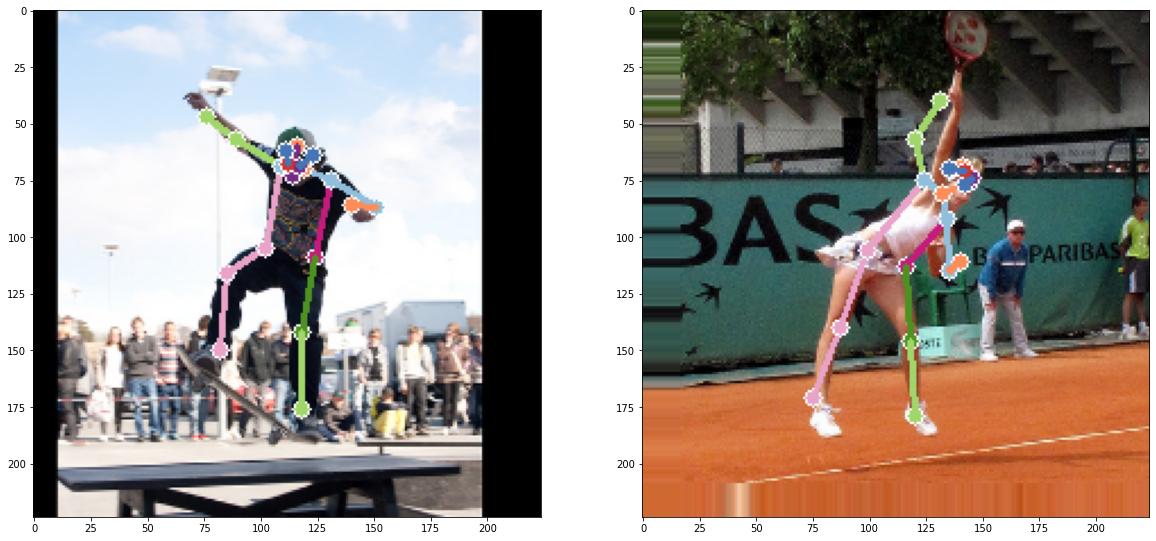

In [ ]:
input_frames = [inp,inp2]
results = []
joints = []
vertices = []
img_2ds = []
cams = []

for image in input_frames:
    result = model.detect(image)
    results.append(result)
    joint = np.squeeze(result['kp2d'].numpy())    # convert the result joints result to numpy array
    joints.append(joint)

    img_2ds.append(draw_2d_on_image(image, joint))    # draw 2d points on images
    cams.append(np.squeeze(result['cam'].numpy())[:3])  # parameter of the camera
    vertices.append(np.squeeze(result['vertices'].numpy())) # the vertices in SMPL model

f, ax = plt.subplots(1,2)        # f means figure, can do some figure-level attributes change, like figure.size and save figure.
ax[0].imshow(img_2ds[0])         # ax is the object that has plotting methods.
ax[1].imshow(img_2ds[1])


f.set_size_inches(20,20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


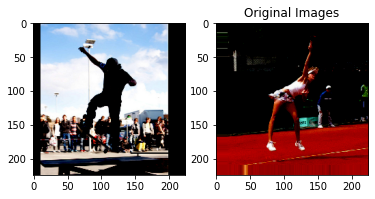

In [ ]:
f2, ax2 = plt.subplots(1,2)
plt.title("Original Images")

ax2[0].imshow(inp)
ax2[1].imshow(inp2)

In [ ]:
from visualise.trimesh_renderer import TrimeshRenderer
renderer = TrimeshRenderer()

mesh = renderer.mesh(vertices[1])
mesh.show()

In [ ]:
print(type(vertices[0]))
np.save('vertices_sample', vertices[0])

<class 'numpy.ndarray'>


In [ ]:
!pwd

/content/drive/My Drive/HME/hmr2.0-master/src


YEAH! Finally we can see the result.